In [10]:
import os
os.chdir('/data/wjk/Workspace/Datasets/IGR')

import os.path as osp
import pandas as pd
pd.set_option('display.width', 500)    #设置整体宽度
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mtools import plot_cdf, plot_fig, load_json

df = pd.read_csv('Output/stat_df.csv')
data_path = 'IGRData/IGR230503'
exclude_phone = ['Mi8']
df=df[~df.isin(exclude_phone)]
df["err_h"]*=100
df["err_x"]*=100
df["err_y"]*=100
df["length"] = np.sqrt(df["gt_x"]**2 + df["gt_y"]**2)
pdf = df.rename(columns={'err_x':'Noise east (cm)','err_y':'Noise north (cm)', 'phone':'Device'})

pdf["Route type"] = pdf["route"]
pdf["trip"] = pdf["trip"]
pdf["Train type"] = pdf["trip"]
# route_type_dict = load_json(osp.join('plots', 'route_type_dict.json'))
# train_type_dict = load_json(osp.join('plots', 'train_type_dict.json'))
# for route in route_type_dict:
#     pdf.loc[pdf.__getattr__("Route type") == route, ('Route type')] = route_type_dict[route]
# for route in train_type_dict:
#     pdf.loc[pdf.__getattr__("Train type") == route, ('Train type')] = train_type_dict[route]

print(df.groupby('people').mean(numeric_only=True))
df.groupby('people').mean(numeric_only=True).to_csv('IGRData/IGR230503/all_info.csv')

                err_x     err_y      err_h      gt_x      gt_y    length
people                                                                  
hushunkang   0.052638  0.036122  14.075096 -0.064978  0.272230  1.118171
lizhaobang  -0.143054 -0.216007   9.832979  0.054544  0.097712  1.117903
oumengling  -0.380868  0.085114  12.397899  0.014727  0.116631  1.180407
tongyuefan  -0.287697  0.062569  10.505714  0.122719  0.011100  1.200247
wangyinhe   -0.093994  0.238954  15.056081  0.122888  0.026159  1.294899
yangjianyu  -0.099733  0.116372  14.988083  0.023552  0.131522  1.237161
zhangyupeng -0.064624  0.024524  17.875453  0.087740  0.053621  1.105705


In [12]:
df[["err_x","err_y","gt_x","gt_y"]].corr().to_csv('Output/corr.csv')
des = df.groupby('people')["err_h"].describe(percentiles=[.2, .25, .5, .75, .8, 0.9])
print(des)
des.to_csv(f'{data_path}/error_info.csv')

des = pdf.groupby('Route type')["err_h"].describe(percentiles=[.2, .25, .5, .75, .8, 0.9])
print(des)
des.to_csv(f'{data_path}/error_info_bytype.csv')

des = df.groupby('phone')["err_h"].describe(percentiles=[.2, .25, .5, .75, .8, 0.9])
print(des)
des.to_csv(f'{data_path}/error_info_byphone.csv')

des = df.groupby('phone')["length"].describe(percentiles=[.2, .25, .5, .75, .8, 0.9])
print(des)
des.to_csv(f'{data_path}/length_info.csv')

              count       mean        std       min       20%       25%        50%        75%        80%        90%         max
people                                                                                                                         
hushunkang   2593.0  14.075096  12.830222  0.187124  5.880502  6.784958  11.287066  17.666962  19.395781  25.707502  235.506100
lizhaobang   3112.0   9.832979   9.096497  0.062530  4.292518  4.860916   7.884021  12.211859  13.602323  18.037733  172.968089
oumengling   3111.0  12.397899  15.642583  0.074412  4.826371  5.578924   9.285350  14.638399  16.359017  22.645988  379.689720
tongyuefan   3114.0  10.505714  10.707913  0.238563  4.349398  4.993210   8.278913  13.001030  14.450750  19.537405  233.373283
wangyinhe    3111.0  15.056081  16.574720  0.140673  5.794871  6.789165  11.203348  18.023484  20.346046  28.125007  273.058682
yangjianyu   3114.0  14.988083  13.150536  0.081928  6.542746  7.322719  11.913863  18.207211  20.483204

In [4]:
# pdf.columns
item_index = pdf.columns.to_list().index('Train type')
print(pdf.columns.to_list())

# train_pdf = pdf.loc[pdf['Train type']=='train']
# des = train_pdf.groupby('Device')["err_h"].describe(percentiles=[.2, .25, .5, .75, .8, 0.9])
# print(des)

['Noise east (cm)', 'Noise north (cm)', 'err_h', 'gt_x', 'gt_y', 'Device', 'trip', 'length', 'Route type', 'Train type']


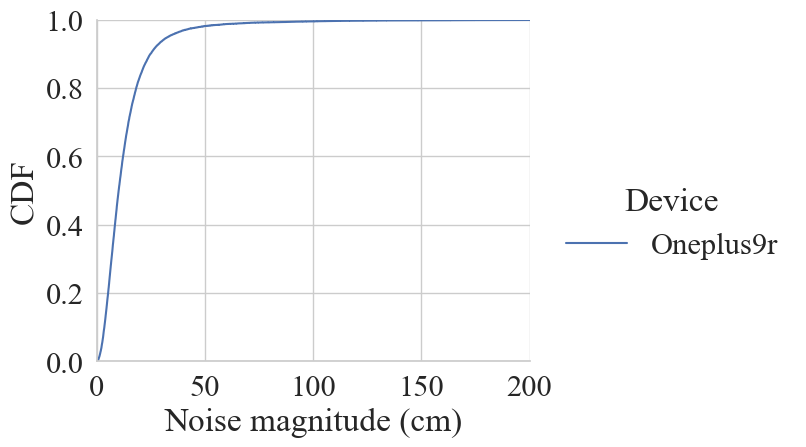

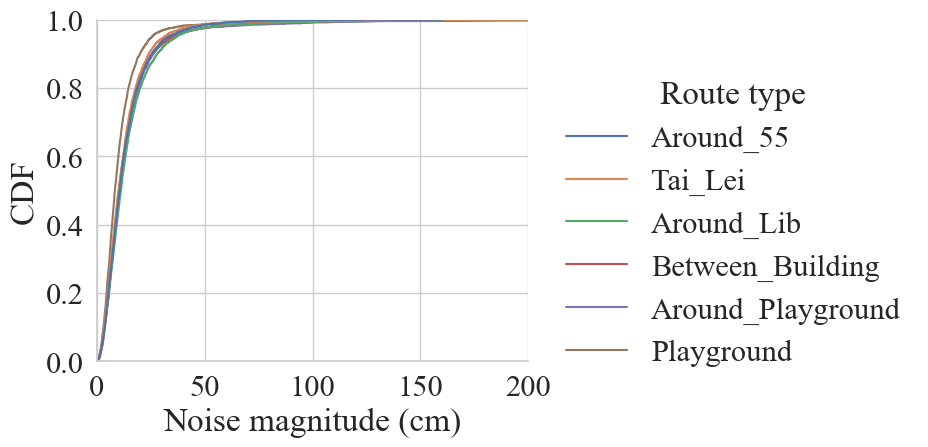

In [3]:
# g = plot_cdf(df, 'err_h', xlabel='Noise magnitude (cm)', xlim=[0, 200], plot_params={'aspect':1.2})
# plt.show()
# g.savefig('Figures/err_h_cdf.png', dpi=150, pad_inches=0.2)

g = plot_cdf(pdf, 'err_h', xlabel='Noise magnitude (cm)', xlim=[0, 200], fig_param={'font_scale':2.0}, plot_params={'aspect':1.2, 'hue':'Device'}) # 'col':'phone', 'col_wrap': 4
plt.show()
# g.savefig('Figures/err_h_cdf_byphone.png', dpi=150, pad_inches=0.2)

g = plot_cdf(pdf, 'err_h', xlabel='Noise magnitude (cm)', xlim=[0, 200], fig_param={'font_scale':2.0}, plot_params={'aspect':1.2, 'hue':'Route type'}) # 'col':'phone', 'col_wrap': 4
plt.show()
# g.savefig('Figures/err_h_cdf_bytype.png', dpi=150, pad_inches=0.2)

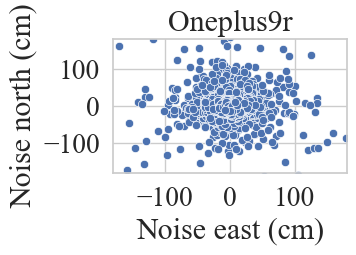

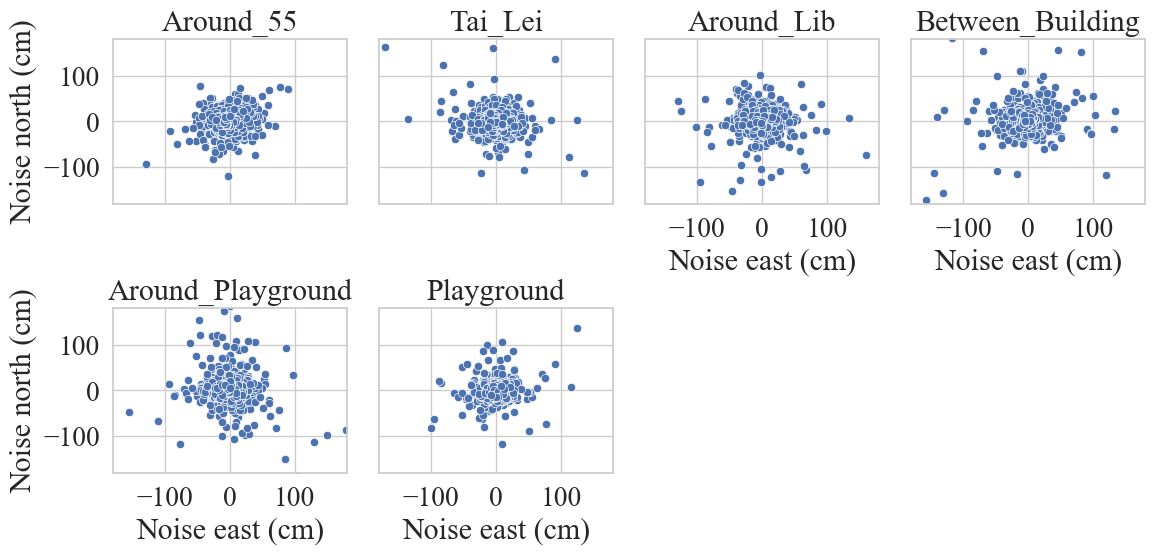

In [4]:
sns.set(**{'style':'whitegrid', 'font_scale':1.8, 'font':'Times New Roman'})
g = sns.FacetGrid(pdf, col="Device",  col_wrap=4, xlim=[-180, 180], ylim=[-180, 180], despine=False)
g.map(sns.scatterplot, "Noise east (cm)", "Noise north (cm)")
g.set_titles("{col_name}")

plt.show()
# g.savefig('Figures/err_scatter_byphone.png', dpi=150, pad_inches=0.2)

sns.set(**{'style':'whitegrid', 'font_scale':1.8, 'font':'Times New Roman'})
g = sns.FacetGrid(pdf, col="Route type",  col_wrap=4, xlim=[-180, 180], ylim=[-180, 180], despine=False)
g.map(sns.scatterplot, "Noise east (cm)", "Noise north (cm)")
g.set_titles("{col_name}")
plt.show()
# g.savefig('Figures/err_scatter_bytype.png', dpi=150, pad_inches=0.2)

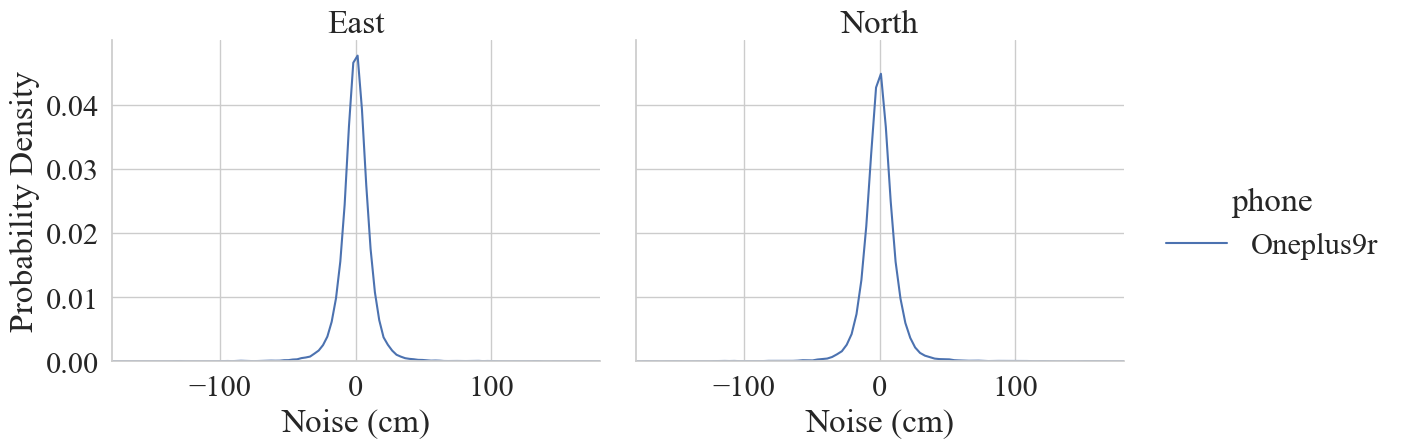

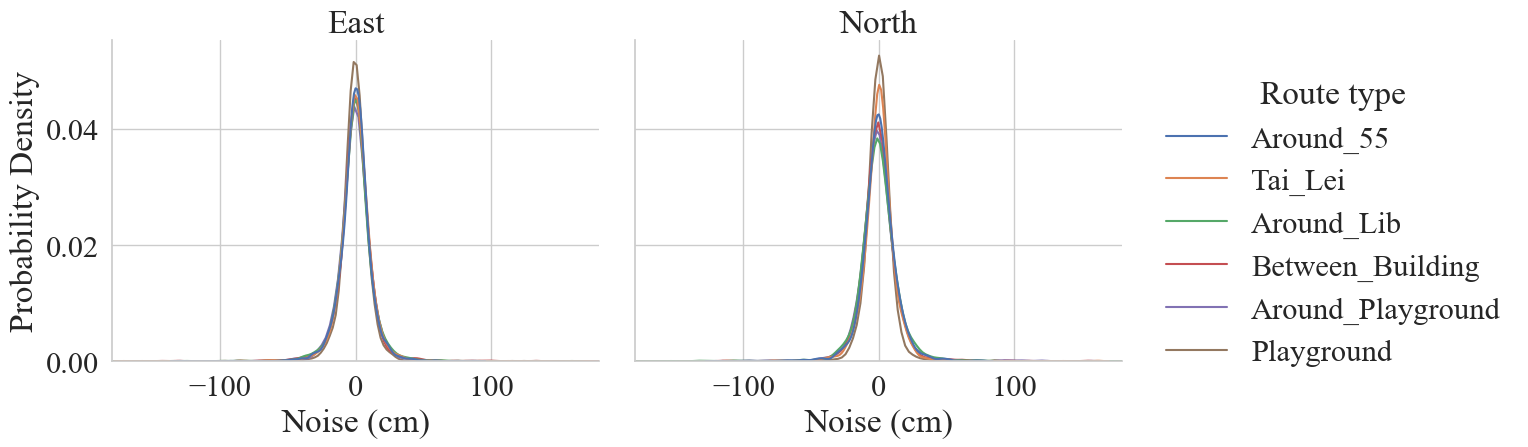

In [5]:
import numpy as np
new_df = pd.DataFrame({
    'err': np.hstack((df['err_x'].values, df['err_y'].values)),
    'phone': np.hstack((df['phone'].values, df['phone'].values)),
    'type': ['East']*len(pdf) + ['North']*len(pdf)
})
g = plot_fig(sns.displot, new_df, xlim=[-180, 180], xlabel='Noise (cm)', ylabel='Probability Density', fig_param={'font_scale':2.0}, plot_params={'x':'err', 'kind':'kde', 'aspect':1.2, 'hue':'phone', 'common_norm':False, 'col': 'type'}) # 
g.set_titles("{col_name}")
plt.show()
g.savefig('Figures/err_dist_byphone.png', dpi=150, pad_inches=0.2)

new_df = pd.DataFrame({
    'err': np.hstack((df['err_x'].values, df['err_y'].values)),
    'Route type': np.hstack((pdf['Route type'].values, pdf['Route type'].values)),
    'type': ['East']*len(pdf) + ['North']*len(pdf)
})
g = plot_fig(sns.displot, new_df, xlim=[-180, 180], xlabel='Noise (cm)', ylabel='Probability Density', fig_param={'font_scale':2.0}, plot_params={'x':'err', 'kind':'kde', 'aspect':1.2, 'hue':'Route type', 'common_norm':False, 'col': 'type'}) # 
g.set_titles("{col_name}")
plt.show()
g.savefig('Figures/err_dist_bytype.png', dpi=150, pad_inches=0.2)